<a href="https://colab.research.google.com/github/silviacfreitas/AnaliseNotasEnem2019/blob/main/BootcampDSModulo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 03

# Aula 01

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "/content/drive/MyDrive/BootcampDSModulo03/PeNSE_2015_AMOSTRA2.zip"


In [3]:
zip = ZipFile(url)

In [4]:
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [5]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [6]:
caminho_pasta_zipada = zip.namelist()[1]
caminho_pasta_zipada

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [7]:
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep=";", thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


### Desafio 01: Descompactar a pasta usando comandos Bash

O Colab utiliza Linux, portanto é possível utilizar os comandos bash para acessar pastas e arquivos

In [8]:
!ls

drive  sample_data


In [9]:
cd drive

/content/drive


In [10]:
cd MyDrive/

/content/drive/MyDrive


In [11]:
cd BootcampDSModulo03/

/content/drive/MyDrive/BootcampDSModulo03


In [12]:
#!unzip PeNSE_2015_AMOSTRA2.zip
# a pasta já havia sido descompactada no teste, por isso não é necessário rodar este comando novamente

In [13]:
ls

'arquivos csv'/    BootcampDSModulo03.ipynb
'arquivos sas'/    Dicionario_PENSE_Microdados_AMOSTRA2.xls
'arquivos xlsx'/   PeNSE_2015_AMOSTRA2.zip


In [14]:
cd arquivos\ csv

/content/drive/MyDrive/BootcampDSModulo03/arquivos csv


In [15]:
ls

PENSE_AMOSTRA2_ALUNO.CSV        PENSE_AMOSTRA2_ESCOLA.CSV
PENSE_AMOSTRA2_ALUNOESCOLA.CSV


In [16]:
caminho = '/content/drive/My Drive/BootcampDSModulo03/arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [17]:
dados = pd.read_csv(caminho, sep=';', thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


# Aula 02

In [18]:
dados.shape

(16556, 181)

In [19]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [21]:
dados.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


Explorando os dados: <br><br>
Vamos observar primeiro a pergunta 'VB01001': <br><br>
Qual é o seu sexo? <br>


1.   Masculino
2.   Feminino



In [22]:
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [23]:
dados['VB01001'].value_counts(normalize=True) * 100


1    50.054361
2    49.945639
Name: VB01001, dtype: float64

A próxima questão que iremos abordar é a 'VB11007': <br><br>
Como você se sente em relação ao seu corpo?<br>
1. Muito satisfeito(a)
2. Satisfeito(a)
3. Indiferente
4. Insatisfeito(a)
5. Muito insatisfeito(a)
99. Não informado


In [24]:
frequencia = dados['VB11007'].value_counts()
frequencia


2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [25]:
percentual = dados['VB11007'].value_counts(normalize=True) * 100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [26]:
respostas = {
  1: 'Muito satisfeito(a)',
  2: 'Satisfeito(a)',
  3: 'Indiferente',
  4: 'Insatisfeito(a)',
  5: 'Muito insatisfeito(a)',
  99: 'Não informado',
}

dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
dist_freq.rename(index=respostas, inplace=True)
dist_freq.rename_axis('Sentimento com relação ao corpo', axis=1, inplace=True)
dist_freq


Sentimento com relação ao corpo,Frequência,Percentual
Satisfeito(a),6920,41.797536
Muito satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito(a),714,4.312636
Não informado,181,1.093259


### Desafio 02: Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações. 

In [27]:
def criar_freq(numero_pergunta: str, pergunta: str, respostas: object):
  frequencia = dados[numero_pergunta].value_counts()
  percentual = dados[numero_pergunta].value_counts(normalize=True)*100
  dist_frequencia = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
  dist_frequencia.rename(index=respostas, inplace=True)
  dist_frequencia.rename_axis(pergunta, axis=1, inplace=True)
  return dist_frequencia

In [28]:
criar_freq('VB10004', 
           'NOS ÚLTIMOS 30 DIAS, com que frequência você lavou as mãos antes de comer?',
           {
              1: 'Nunca',
              2: 'Raramente',
              3: 'Às vezes',
              4: 'Na maioria das vezes',
              5: 'Sempre',
              99: 'Não informado'
           })

"NOS ÚLTIMOS 30 DIAS, com que frequência você lavou as mãos antes de comer?",Frequência,Percentual
Sempre,7804,47.136990
Na maioria das vezes,4074,24.607393
Às vezes,2634,15.909640
Raramente,1419,8.570911
Nunca,553,3.340179
Não informado,72,0.434888


In [29]:
criar_freq('VB10005', 
           'NOS ÚLTIMOS 30 DIAS, com que frequência você lavou as mãos após usar o banheiro ou o vaso sanitário?',
           {
              1: 'Nunca',
              2: 'Raramente',
              3: 'Às vezes',
              4: 'Na maioria das vezes',
              5: 'Sempre',
              99: 'Não informado'
           })

"NOS ÚLTIMOS 30 DIAS, com que frequência você lavou as mãos após usar o banheiro ou o vaso sanitário?",Frequência,Percentual
Sempre,11631,70.252476
Na maioria das vezes,2498,15.088186
Às vezes,1334,8.057502
Raramente,666,4.022711
Nunca,342,2.065716
Não informado,85,0.513409


In [30]:
criar_freq('VB10006', 
           'NOS ÚLTIMOS 30 DIAS, com que frequência você usou sabão ou sabonete quando lavou suas mãos?',
           {
              1: 'Nunca',
              2: 'Raramente',
              3: 'Às vezes',
              4: 'Na maioria das vezes',
              5: 'Sempre',
              99: 'Não informado'
           })

"NOS ÚLTIMOS 30 DIAS, com que frequência você usou sabão ou sabonete quando lavou suas mãos?",Frequência,Percentual
Sempre,9712,58.661512
Na maioria das vezes,3545,21.412177
Às vezes,2015,12.170814
Raramente,873,5.273013
Nunca,308,1.860353
Não informado,103,0.622131


In [31]:
criar_freq('VB09003', 
           'NOS ÚLTIMOS 30 DIAS, quantas vezes você foi agredido(a) fisicamente por um adulto da sua família?',
           {
              1: 'Nenhuma vez',
              2: '1 vez',
              3: '2 ou 3 vezes',
              4: '4 ou 5 vezes',
              5: '6 ou 7 vezes',
              6: '8 ou 9 vezes',
              7: '10 ou 11 vezes',
              8: '12 vezes ou mais',
              99: 'Não informado'
           })

"NOS ÚLTIMOS 30 DIAS, quantas vezes você foi agredido(a) fisicamente por um adulto da sua família?",Frequência,Percentual
Nenhuma vez,14164,85.552066
1 vez,962,5.810582
2 ou 3 vezes,439,2.651607
12 vezes ou mais,254,1.534187
4 ou 5 vezes,218,1.316743
Não informado,161,0.972457
6 ou 7 vezes,158,0.954337
8 ou 9 vezes,119,0.718773
10 ou 11 vezes,81,0.489249


In [32]:
criar_freq('VB12001', 
           'NOS ÚLTIMOS 12 MESES com que frequência tem se sentido sozinho(a)? ',
           {
              1: 'Nunca',
              2: 'Raramente',
              3: 'Às vezes',
              4: 'Na maioria das vezes',
              5: 'Sempre',
              99: 'Não informado'
           })

NOS ÚLTIMOS 12 MESES com que frequência tem se sentido sozinho(a)?,Frequência,Percentual
Nunca,5805,35.062817
Às vezes,4580,27.663687
Raramente,3584,21.647741
Na maioria das vezes,1601,9.670210
Sempre,920,5.556898
Não informado,66,0.398647


In [33]:
criar_freq('VB12002', 
           'NOS ÚLTIMOS 12 MESES, com que frequência você não conseguiu dormir à noite porque algo o(a) preocupava muito? ',
           {
              1: 'Nunca',
              2: 'Raramente',
              3: 'Às vezes',
              4: 'Na maioria das vezes',
              5: 'Sempre',
              99: 'Não informado'
           })

"NOS ÚLTIMOS 12 MESES, com que frequência você não conseguiu dormir à noite porque algo o(a) preocupava muito?",Frequência,Percentual
Nunca,5701,34.434646
Raramente,4736,28.605943
Às vezes,4149,25.060401
Na maioria das vezes,1374,8.299106
Sempre,519,3.134815
Não informado,77,0.465088


In [34]:
criar_freq('VB12003', 
           'Quantos amigos(as) próximos você tem?',
           {
              1: 'Nenhum',
              2: '1',
              3: '2',
              4: '3 ou mais',
              99: 'Não informado'
           })

Quantos amigos(as) próximos você tem?,Frequência,Percentual
3 ou mais,12803,77.331481
2,2056,12.418459
1,988,5.967625
Nenhum,642,3.877748
Não informado,67,0.404687


# Aula 03

In [35]:
dados['IMC'] = dados['VB17003']/(dados['VB17004']/100)**2
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [36]:
classes = [0, 18.5, 25, 30, 60]
labels = ['abaixo', 'ideal', 'sobrepeso', 'obesidade']

In [37]:
dados['CLASSE_IMC'] = pd.cut(x = dados['IMC'],
       bins = classes,
       labels = labels,
       include_lowest = True)
dados[['IMC','CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,ideal
2,18.502907,ideal
3,23.322831,ideal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,ideal
16552,17.930782,abaixo
16553,23.968489,ideal
16554,18.995343,ideal


In [38]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC,CLASSE_IMC
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296,15.051321,abaixo
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296,21.727839,ideal
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296,18.502907,ideal
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296,23.322831,ideal
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296,28.122076,sobrepeso


In [39]:
frequencia = dados['CLASSE_IMC'].value_counts()
percentual = dados['CLASSE_IMC'].value_counts(normalize=True)*100
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
# dist_freq.rename(index=respostas, inplace=True)
# dist_freq.rename_axis('Sentimento com relação ao corpo', axis=1, inplace=True)
dist_freq

,Frequência,Percentual
ideal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


No caso da altura, por exemplo, não temos parêmetros de intervalos para calcularmos a frequencia. Nesse caso, vamos calcular primeiro os valores mínimo e máximo.

In [40]:
dados['VB17004'].min()

124.1

In [41]:
dados['VB17004'].max()


195.3

O número de classes (k) depende do tamanho da amostra. <br>
A fórmula é: <br>
k = 1 + 10 / 3 * log10(tamanho_amostra) <br><br>
Para atilizarmos essa fómula, vamos importar o numpy e utilizá-lo para calcular o log10

In [42]:
tamanho_amostra = len(dados)
tamanho_amostra

16556

In [43]:
k = int(1 + ((10/3)*np.log10(tamanho_amostra)))
k

15

In [44]:
dados['CLASSE_ALTURA'] = pd.cut(x = dados['VB17004'], bins = k, include_lowest=True)
dados['CLASSE_ALTURA']

0         (152.58, 157.327]
1         (147.833, 152.58]
2        (157.327, 162.073]
3        (171.567, 176.313]
4         (166.82, 171.567]
                ...        
16551     (166.82, 171.567]
16552     (181.06, 185.807]
16553    (157.327, 162.073]
16554    (157.327, 162.073]
16555     (162.073, 166.82]
Name: CLASSE_ALTURA, Length: 16556, dtype: category
Categories (15, interval[float64]): [(124.02799999999999, 128.847] < (128.847, 133.593] < (133.593, 138.34] <
                                     (138.34, 143.087] ... (176.313, 181.06] < (181.06, 185.807] <
                                     (185.807, 190.553] < (190.553, 195.3]]

In [45]:
frequencia = dados['CLASSE_ALTURA'].value_counts()
percentual = dados['CLASSE_ALTURA'].value_counts(normalize=True)*100
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
dist_freq

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


### Desafio 03: Criar a tabela de frequência para o peso

In [46]:
dados['CLASSE_PESO'] = pd.cut(x = dados['VB17003'], bins = k, include_lowest=True)
dados['CLASSE_PESO']

0        (34.94, 46.32]
1         (46.32, 57.7]
2         (46.32, 57.7]
3        (69.08, 80.46]
4        (69.08, 80.46]
              ...      
16551     (46.32, 57.7]
16552     (57.7, 69.08]
16553     (57.7, 69.08]
16554     (46.32, 57.7]
16555     (57.7, 69.08]
Name: CLASSE_PESO, Length: 16556, dtype: category
Categories (15, interval[float64]): [(0.628, 12.18] < (12.18, 23.56] < (23.56, 34.94] <
                                     (34.94, 46.32] ... (125.98, 137.36] < (137.36, 148.74] <
                                     (148.74, 160.12] < (160.12, 171.5]]

In [47]:
def criar_frequencia(classe: str):
  frequencia = dados[classe].value_counts()
  percentual = dados[classe].value_counts(normalize=True)*100
  dist_frequencia = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
  return dist_frequencia

In [48]:
criar_frequencia('CLASSE_PESO')

,Frequência,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


Vamos agora cruzar a frequência da pergunta sobre aceitação do corpo com o sexo.

In [49]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'])
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),2682,1926
Satisfeito(a),3490,3430
Indiferente,950,857
Insatisfeito(a),786,1540
Muito insatisfeito(a),260,454
Não informado,119,62


Para calcular a porcentagem, vamos adicionar o normalize no pd.crosstab, porém nas colunas

In [50]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize='columns') * 100
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),32.363944,23.291813
Satisfeito(a),42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito(a),9.484735,18.623776
Muito insatisfeito(a),3.137444,5.490386
Não informado,1.435984,0.749788


Temos também a possibilidade de fazer a normalização pelo index (pelas linhas)

In [51]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize='index')*100
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),58.203125,41.796875
Satisfeito(a),50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito(a),33.791917,66.208083
Muito insatisfeito(a),36.414566,63.585434
Não informado,65.745856,34.254144


### Desafio 04: Criar outros crosstabs para analisar as perguntas e pesquisar o parâmetro aggfunc para testar em alguns experimentos

Vamos criar uma tabela relacionando a idade dos participantes com a região onde moram.

In [52]:
idade = {
    11: '11 anos ou menos',
    12: '12 anos',
    13: '13 anos',
    14: '14 anos',
    15: '15 anos',
    16: '16 anos',
    17: '17 anos',
    18: '18 anos',
    19: '19 anos ou mais'
}
frequencia_cruzada = pd.crosstab(dados['VB01003'], dados['REGEOGR'], normalize='columns')*100
frequencia_cruzada.rename(index=idade, inplace=True)
frequencia_cruzada.rename_axis('Idade', inplace=True)
frequencia_cruzada.rename(columns={1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}, inplace=True)
frequencia_cruzada

REGEOGR,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
Idade,,,,,
11 anos ou menos,9.598494,12.207792,11.782662,14.655441,14.239766
12 anos,15.432873,15.699856,19.474969,13.314624,15.584795
13 anos,18.381430,12.265512,15.384615,13.096352,18.304094
14 anos,14.774153,11.572872,9.615385,12.753352,15.701754
15 anos,13.707654,16.392496,13.644689,16.806985,12.690058
16 anos,12.703890,15.007215,14.346764,14.624259,11.871345
17 anos,7.528231,10.476190,10.592186,9.822264,7.953216
18 anos,3.293601,4.011544,3.540904,3.398815,2.748538
19 anos ou mais,4.579674,2.366522,1.617827,1.527908,0.906433


Agora, sabendo que a maioria dos alunos, em todas as regiões, é menor de idade, vamos analisar a porcentagem de alunos que possuem algum tipo de trabalho

In [53]:
frequencia_cruzada = pd.crosstab(dados['VB01011'], dados['REGEOGR'], normalize='columns')*100
frequencia_cruzada.rename(index={1: 'Sim', 2: 'Não', 3: 'Não informado'}, inplace=True)
frequencia_cruzada.rename_axis('Você trabalha?', inplace=True)
frequencia_cruzada.rename(columns={1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}, inplace=True)
frequencia_cruzada

REGEOGR,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
Você trabalha?,,,,,
Sim,14.335006,11.139971,14.774115,20.486436,14.239766
Não,85.664994,88.831169,85.195360,79.326473,85.584795
99,0.000000,0.028860,0.030525,0.187091,0.175439


Mesmo com a maior porte dos alunos sendo menor de idade, podemos verificar que a taxa de alunos que trabalham é relevante, especialmente na região Sul (20,5%).

Outro ponto interessante para analisarmos: qual o motivo pelo qual os alunos sofreram bulling? Na tabela abaixo vamos analisar porque meninos e meninas se sentiram zombados ou humilhados.

In [54]:
respostas = {
    -1: 'Sem resposta',
    1: 'Cor ou raça',
    2: 'Religião',
    3: 'Aparência do rosto',
    4: 'Aparência do corpo',
    5: 'Orientação sexual',
    6: 'Região de origem',
    7: 'Outros motivos',
    99: 'Não informado'
}
frequencia_cruzada = pd.crosstab(dados['VB07008'], dados['VB01001'], normalize='index')*100
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename_axis('Motivo de Bulling', inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
Motivo de Bulling,,
Sem resposta,49.113514,50.886486
Cor ou raça,65.508685,34.491315
Religião,56.846473,43.153527
Aparência do rosto,55.177305,44.822695
Aparência do corpo,44.414414,55.585586
Orientação sexual,71.875000,28.125000
Região de origem,57.142857,42.857143
Outros motivos,49.766095,50.233905
Não informado,55.696203,44.303797


Podemos observar que meninas se sofrem mais com a aparência do corpo enquanto meninos sofrem com orientação sexual, etinia e região de origem.

Agora com a noralização pela coluna para avaliarmos também essa tendência.

In [55]:
frequencia_cruzada = pd.crosstab(dados['VB07008'], dados['VB01001'], normalize='columns')*100
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename_axis('Motivo de Bulling', inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
Motivo de Bulling,,
Sem resposta,54.820804,56.923449
Cor ou raça,3.185713,1.680977
Religião,1.653192,1.257710
Aparência do rosto,4.694099,3.821502
Aparência do corpo,5.949077,7.461604
Orientação sexual,1.387716,0.544201
Região de origem,0.820562,0.616761
Outros motivos,26.957886,27.270528
Não informado,0.530952,0.423268


Para usarmos o parâmetro aggfunc, vamos analisar a média das idades de cada uma das respostas sobre bulling.

In [56]:
frequencia_cruzada = pd.crosstab(dados['VB07008'], dados['VB01001'], values=dados['VB01003'], aggfunc=np.mean)
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename_axis('Motivo de Bulling', inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
Motivo de Bulling,,
Sem resposta,14.259960,14.156363
Cor ou raça,13.992424,14.043165
Religião,14.503650,14.048077
Aparência do rosto,13.850900,13.712025
Aparência do corpo,13.892495,13.834684
Orientação sexual,14.660870,14.044444
Região de origem,13.970588,14.882353
Outros motivos,14.092659,13.836364
Não informado,13.159091,13.285714


# Aula 04

Podemos fazer as relações entre os dados através de gráficos.<br>
Vamos começar com um histograma.



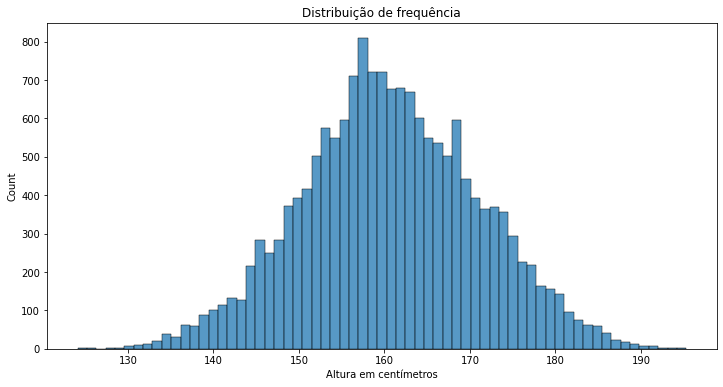

In [57]:
ax = sns.histplot(data=dados, x=dados['VB17004'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
plt.show()

### Desafio 05: Calcular e plotar: o desvio padrão, a média, a moda e a media.



In [58]:
media = dados['VB17004'].mean()
media



160.71311307078818

In [59]:
mediana = dados['VB17004'].median()
mediana

160.4

In [60]:
moda = dados['VB17004'].mode()
moda
moda[0]

160.0

In [61]:
desvio_padrão = dados['VB17004'].std()
desvio_padrão

10.3400702338278

In [62]:
menor_std = media - desvio_padrão
menor_std

150.3730428369604

In [63]:
maior_std = media + desvio_padrão
maior_std

171.05318330461597

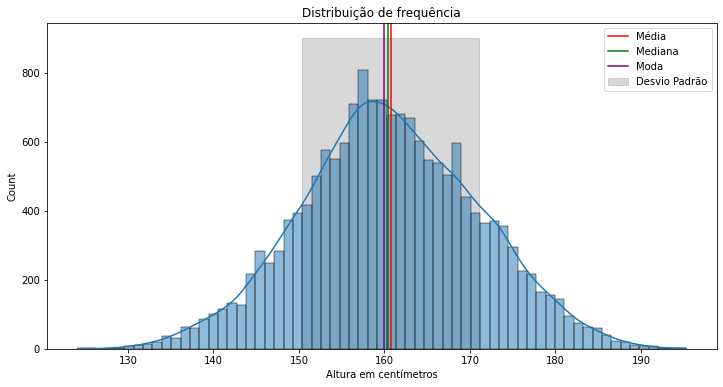

In [64]:
ax = sns.histplot(data=dados, x=dados['VB17004'], kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
ax.axvline(media, color='red', linestyle='-', label='Média')
ax.axvline(mediana, color='green', linestyle='-', label='Mediana')
ax.axvline(moda[0], color='purple', label='Moda')
ax.fill_betweenx(y=[0,900], 
                 x1=menor_std,
                 x2=maior_std,
                 color='gray', label='Desvio Padrão', alpha=0.30)
ax.legend()
plt.show()

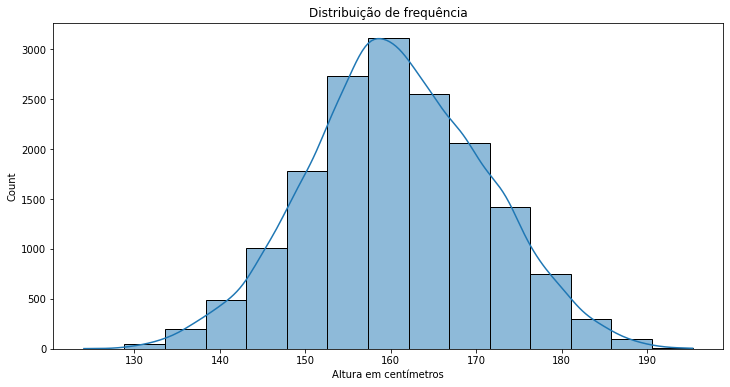

In [65]:
ax = sns.histplot(data=dados, x=dados['VB17004'], bins=k, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
plt.show()

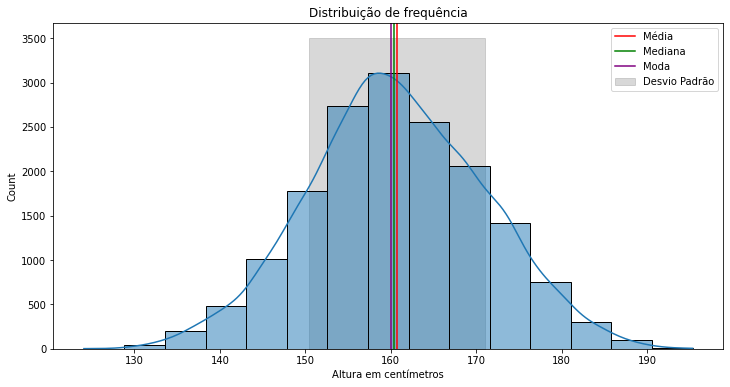

In [66]:
ax = sns.histplot(data=dados, x=dados['VB17004'], kde=True, bins=k)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
ax.axvline(media, color='red', linestyle='-', label='Média')
ax.axvline(mediana, color='green', linestyle='-', label='Mediana')
ax.axvline(moda[0], color='purple', label='Moda')
ax.fill_betweenx(y=[0,3500], 
                 x1=menor_std,
                 x2=maior_std,
                 color='gray', label='Desvio Padrão', alpha=0.30)
ax.legend()
plt.show()

Para relacionar dados no mesmo histograma, podemos usar o parâmetro "hue". Abaixo podemos ver o mesmo gráfico separado por sexo e comparar a distribuição de frequência.

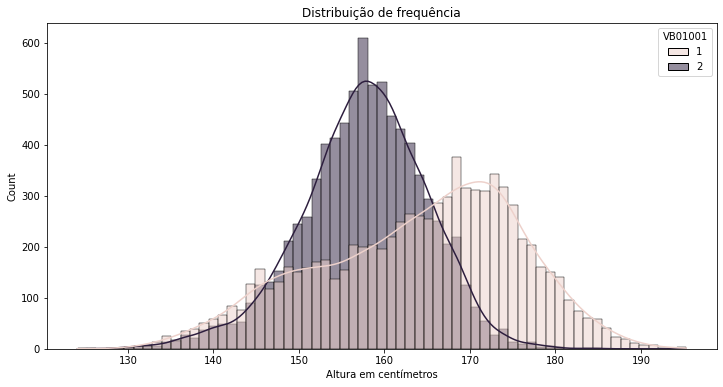

In [67]:
ax = sns.histplot(data=dados, x=dados['VB17004'], kde=True, hue=dados['VB01001'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
plt.show()

### Desafio Extra: Plotar o desvio padrão, média, mediana e moda para homens e mulheres

In [68]:
dados_mulheres = dados.query("VB01001 == 2")
dados_mulheres.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC,CLASSE_IMC,CLASSE_ALTURA,CLASSE_PESO
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296,15.051321,abaixo,"(152.58, 157.327]","(34.94, 46.32]"
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296,21.727839,ideal,"(147.833, 152.58]","(46.32, 57.7]"
5,2015,76,1,1,2,4,14,12,6,1,1,7,3,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,7,7,8,3,8,1,5,6,1,4,1,...,2,4,1,2,2,1,1,1,1,2,1,2,2,2,1,2,2,2,1,2,729.0,1605.0,72.9,160.5,2,4,1223,1,355.170081,1,2,4,1,6,1,296,28.299415,sobrepeso,"(157.327, 162.073]","(69.08, 80.46]"
6,2015,76,1,1,2,1,14,3,7,1,1,7,3,2,-1,1,1,1,1,1,2,5,1,4,1,2,2,5,3,8,2,3,1,3,2,1,1,5,4,1,...,5,4,1,3,1,2,3,5,1,1,2,2,2,2,2,1,2,2,2,2,493.0,1575.0,49.3,157.5,2,2,1223,1,355.170081,1,2,4,1,7,1,296,19.874024,ideal,"(157.327, 162.073]","(46.32, 57.7]"
7,2015,76,1,1,2,3,14,4,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,7,2,3,5,5,3,1,5,1,-1,2,...,1,4,1,2,3,1,2,-1,1,1,2,2,1,2,2,2,2,2,2,2,669.0,1594.0,66.9,159.4,2,3,1223,1,355.170081,1,2,4,1,8,1,296,26.329917,sobrepeso,"(157.327, 162.073]","(57.7, 69.08]"


In [69]:
dados_homens = dados.query("VB01001 == 1")
dados_homens.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC,CLASSE_IMC,CLASSE_ALTURA,CLASSE_PESO
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296,18.502907,ideal,"(157.327, 162.073]","(46.32, 57.7]"
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296,23.322831,ideal,"(171.567, 176.313]","(69.08, 80.46]"
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296,28.122076,sobrepeso,"(166.82, 171.567]","(69.08, 80.46]"
8,2015,76,1,1,1,4,13,8,7,1,1,7,5,2,-1,2,1,1,1,1,2,3,2,4,1,2,2,5,3,2,1,5,3,6,2,1,4,1,-1,2,...,1,4,1,1,1,3,2,7,1,-1,2,2,1,2,2,2,2,2,2,2,783.0,1700.0,78.3,170.0,2,4,1223,1,299.735235,1,2,4,1,9,1,296,27.093426,sobrepeso,"(166.82, 171.567]","(69.08, 80.46]"
11,2015,76,1,1,1,4,13,9,7,1,1,7,4,2,-1,1,1,1,1,1,2,3,2,4,1,2,2,6,3,7,1,8,8,1,1,1,6,1,-1,2,...,2,4,1,10,1,2,1,5,1,-1,2,2,2,2,2,2,1,2,2,2,578.0,1683.0,57.8,168.3,2,2,1223,1,299.735235,1,2,4,1,12,1,296,20.406081,ideal,"(166.82, 171.567]","(57.7, 69.08]"


In [70]:
media_mulheres = dados_mulheres['VB17004'].mean()
mediana_mulheres = dados_mulheres['VB17004'].median()
moda_mulheres = dados_mulheres['VB17004'].mode()


media_homens = dados_homens['VB17004'].mean()
mediana_homens = dados_homens['VB17004'].median()
moda_homens = dados_homens['VB17004'].mode()

std_mulheres = dados_mulheres['VB17004'].std()
menor_std_mulheres = media_mulheres - std_mulheres
maior_std_mulheres = media_mulheres + std_mulheres

std_homens = dados_homens['VB17004'].std()
menor_std_homens = media_homens - std_homens
maior_std_homens = media_homens + std_homens

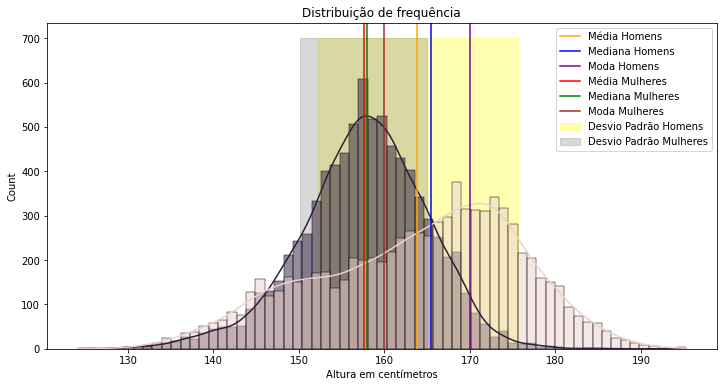

In [71]:
ax = sns.histplot(data=dados, x=dados['VB17004'], kde=True, hue=dados['VB01001'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')

ax.axvline(media_homens, color='orange', linestyle='-', label='Média Homens')
ax.axvline(mediana_homens, color='blue', linestyle='-', label='Mediana Homens')
ax.axvline(moda_homens[0], color='purple', label='Moda Homens')
ax.fill_betweenx(y=[0,700], 
                 x1=menor_std_homens,
                 x2=maior_std_homens,
                 color='yellow', label='Desvio Padrão Homens', alpha=0.30)

ax.axvline(media_mulheres, color='red', linestyle='-', label='Média Mulheres')
ax.axvline(mediana_mulheres, color='green', linestyle='-', label='Mediana Mulheres')
ax.axvline(moda_mulheres[0], color='brown', label='Moda Mulheres')
ax.fill_betweenx(y=[0,700], 
                 x1=menor_std_mulheres,
                 x2=maior_std_mulheres,
                 color='gray', label='Desvio Padrão Mulheres', alpha=0.30)

ax.legend()
plt.show()

Outra questão importante que podemos levar em conta ao analisar a distribuição da altura dos alunos seria a idade.

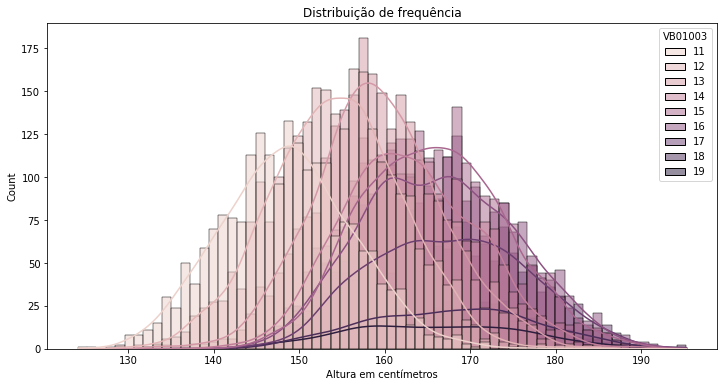

In [72]:
ax = sns.histplot(data=dados, x=dados['VB17004'], kde=True, hue=dados['VB01003'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
ax;


Porém, no histograma, como são muitos gráficos, fica ipossível visualizar com clareza.<br><br>
Podemos utilizar o boxplot para tentar melhorar a visualização.

### Desafio 06: Fazer a análise com histogrma de outras informações da base dos dados.

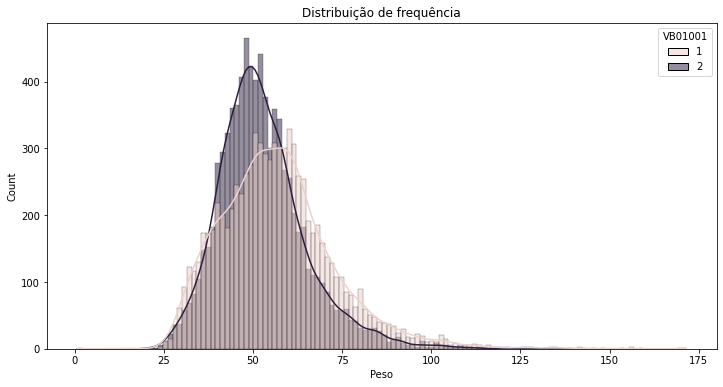

In [73]:
ax = sns.histplot(data=dados, x=dados['VB17003'], kde=True, hue=dados['VB01001'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Peso')
ax;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


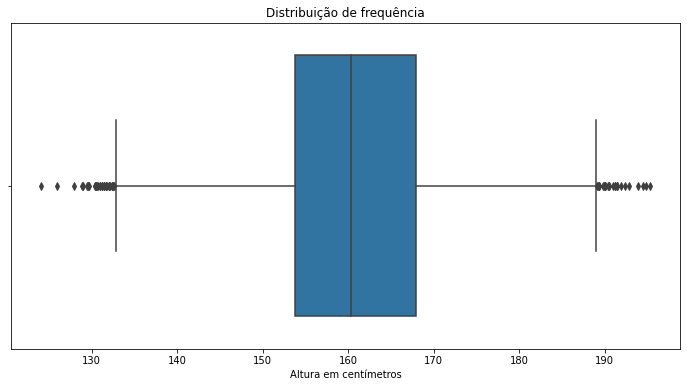

In [74]:
ax = sns.boxplot(dados['VB17004'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
ax;

In [75]:
dados['VB17004'].quantile(0.5)

160.4

### Desafio 07: Pesquisar como são determinados os outliers no boxplot do seaborn.

In [76]:
dados['VB17004'].quantile(0.5)

160.4

In [77]:
Q1 = dados['VB17004'].quantile(0.25)
Q3 = dados['VB17004'].quantile(0.75)
    


In [78]:
# IQR - Interquartile Range
IQR = Q3 - Q1
IQR

14.099999999999994

In [79]:
# Será um outlier se:
Q1 - 1.5 * IQR

132.65000000000003

In [80]:
# ou se:
Q3 + 1.5 * IQR

189.05

Vamos agora utilizar o boxplot para fazer comparações entre os dados:

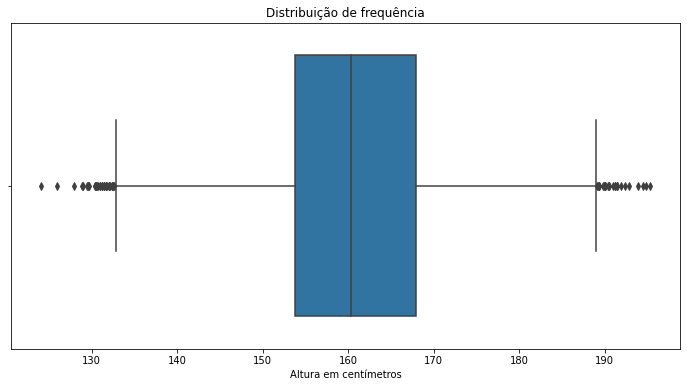

In [81]:
ax = sns.boxplot(data = dados, x = dados['VB17004'], )
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
ax;

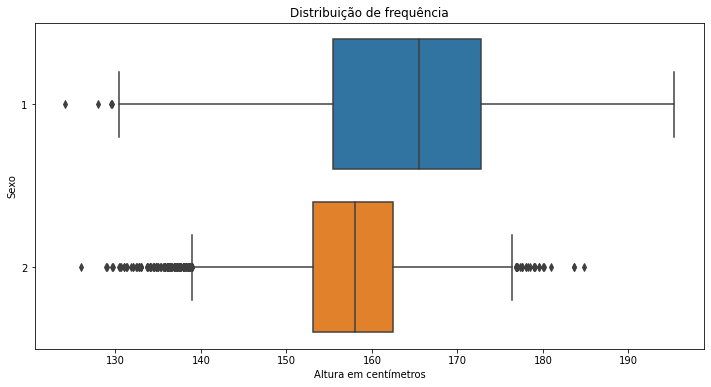

In [82]:
ax = sns.boxplot(data=dados, x='VB17004', y='VB01001', orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
ax.set_ylabel('Sexo')
ax;

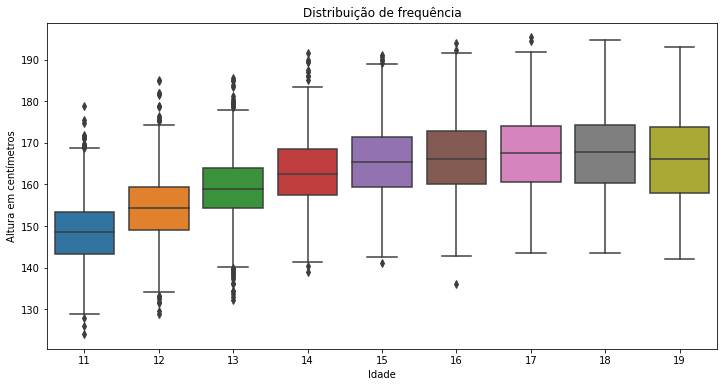

In [83]:
ax = sns.boxplot(data=dados, x='VB01003', y='VB17004')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_ylabel('Altura em centímetros')
ax.set_xlabel('Idade')
ax;

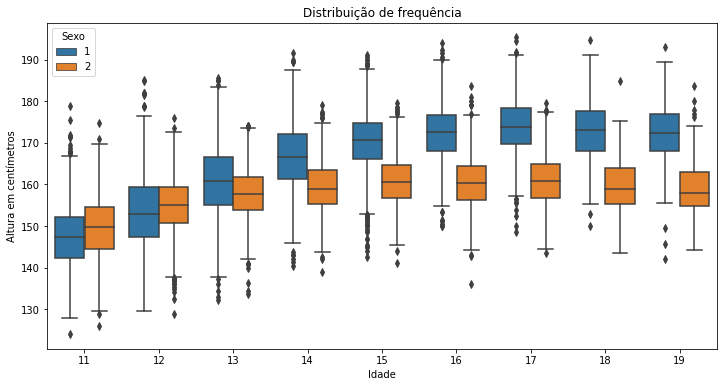

In [84]:
ax = sns.boxplot(data=dados, x='VB01003', y='VB17004', hue='VB01001')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_ylabel('Altura em centímetros')
ax.set_xlabel('Idade')
ax.legend(title='Sexo')
ax;

### Aula 05

Outra forma de comparar dados seria através do histograma cumulativo:

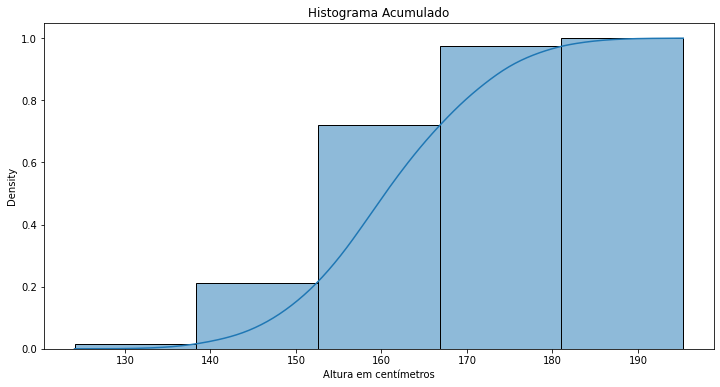

In [85]:
ax = sns.histplot(data=dados, x=dados['VB17004'], 
                  kde=True, 
                  cumulative=True,
                  stat='density',
                  bins=5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma Acumulado')
ax.set_xlabel('Altura em centímetros')
ax;

Média da altura dos alunos:

In [86]:
dados['VB17004'].mean()

160.71311307078818

Separando a média de altura pelo sexo dos alunos:

In [87]:
dados.groupby('VB01001')['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

### Desafio 08: Fazer a análise de outras variáveis.

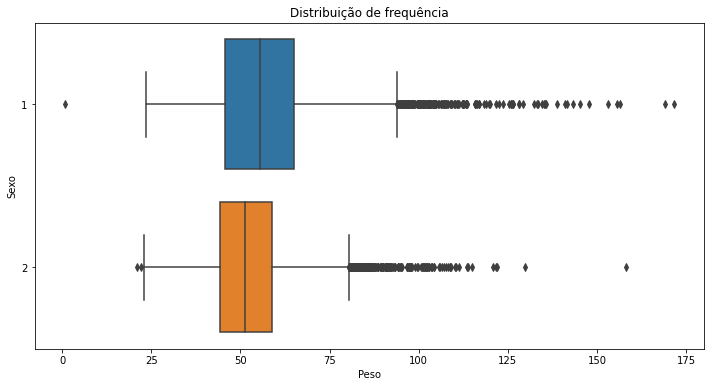

In [88]:
ax = sns.boxplot(data=dados, x='VB17003', y='VB01001', orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Peso')
ax.set_ylabel('Sexo')
ax;

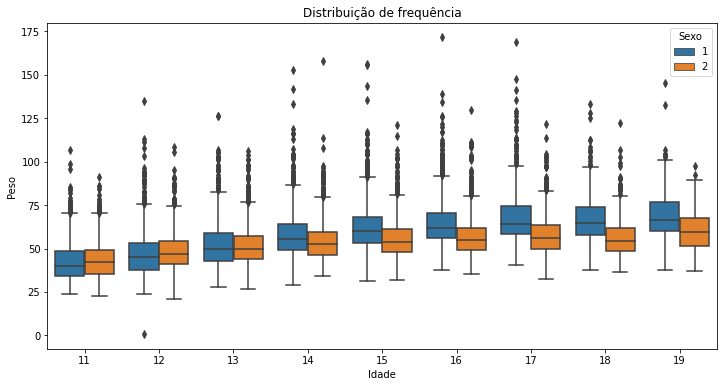

In [89]:
ax = sns.boxplot(data=dados, x='VB01003', y='VB17003', hue='VB01001')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_ylabel('Peso')
ax.set_xlabel('Idade')
ax.legend(title='Sexo')
ax;

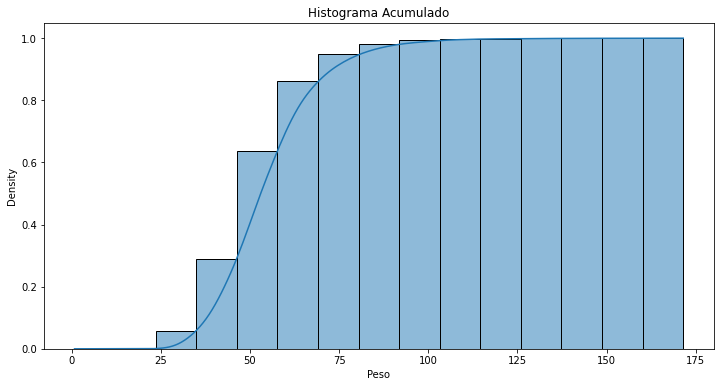

In [90]:
ax = sns.histplot(data=dados, x=dados['VB17003'], 
                  kde=True, 
                  cumulative=True,
                  stat='density',
                  bins=15)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma Acumulado')
ax.set_xlabel('Peso')
ax;

Média do peso dos alunos dividindo por sexo:

In [91]:
dados.groupby('VB01001')['VB17003'].mean()

VB01001
1    56.724436
2    52.682332
Name: VB17003, dtype: float64

Podemos usar o 'groupby' também para mais de uma variável:


In [92]:
dados.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

### Desafio 11: Fazer o cáculo da média por sexo e idade através do 'crosstab':

In [93]:
medias_altura = pd.crosstab(dados['VB01003'], dados['VB01001'], values=dados['VB17004'], aggfunc=np.mean)
medias_altura.rename_axis('Idade', inplace=True)
medias_altura.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
medias_altura

VB01001,Masculino,Feminino
Idade,,
11,147.617753,149.522512
12,153.696764,154.965021
13,160.719801,157.673105
14,166.406922,159.340320
15,170.336297,160.759848
16,172.424933,160.386527
17,173.814341,160.907937
18,173.024561,159.438462
19,172.143158,158.977193


In [94]:
# FIM do desafio

In [95]:
media_altura = dados['VB17004'].mean()
dados['MEDIA_ALTURA'] = media_altura
diferenca_medias = dados['VB17004'] - media_altura
dados['DIFERENCA_MEDIA'] = diferenca_medias
dados[['VB17004', 'MEDIA_ALTURA', 'DIFERENCA_MEDIA']].head()

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA
0,157.0,160.713113,-3.713113
1,152.0,160.713113,-8.713113
2,161.4,160.713113,0.686887
3,172.5,160.713113,11.786887
4,167.5,160.713113,6.786887


A diferença entre a média das alturas e a altura de cada aluno gera tanto números positivos quanto negativos. Uma estratégia para padronizar seria elevar ao quadrado.

In [96]:
diferenca_quadrado = diferenca_medias**2
dados['DIFERENCA_QUADRADO'] = diferenca_quadrado
dados[['VB17004', 'MEDIA_ALTURA', 'DIFERENCA_MEDIA', 'DIFERENCA_QUADRADO']].head()


,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834


A média do quadrado da diferença é conhecida como **variância**.

In [97]:
variancia = diferenca_quadrado.mean()
variancia

106.9105945368652

Porém neste caso, como estamos trabalhando com uma amostra, não uma população, a variância é calculada conforme abaixo:

In [98]:
varianca_amostral = 1 / (len(dados)-1) * diferenca_quadrado.sum()
varianca_amostral

106.91705244049119

O **desvio padrão** nada mais é do que a raiz quadrada da variância amostral.

In [99]:
desvio_padrao = np.sqrt(varianca_amostral)
desvio_padrao

10.340070233827776

# Aula 06

Intervalo de confiança: calculando esse intervalo é possível, a partir de uma amostra, fazer inferências sobre o mundo real.<br>
A chance da média do valor real da população estar dentro desse intervalo de confiança é de 95% (nível de confiança).<br> 
Para calcular o intervalo de confiança, vamos utilizar a biblioteca statsmodels (já vem instalada no Colab).

In [100]:
from statsmodels.stats.weightstats import zconfint

In [101]:
zconfint(dados['VB17004'].to_list())

(160.5556082427712, 160.87061789880892)

O ttest seria outra forma de calcular o intervalo de confiança:


In [102]:
from statsmodels.stats.weightstats import DescrStatsW

In [103]:
descricao_alturas = DescrStatsW(dados['VB17004'])
descricao_alturas

In [104]:
descricao_alturas.tconfint_mean()

(160.55559672649298, 160.8706294150872)

In [105]:
intervalo_confianca = descricao_alturas.tconfint_mean()
intervalo_confianca[0]

160.55559672649298

In [106]:
intervalo_confianca[1]

160.8706294150872

### Desafio 12: Plotar o intervalo de confiança no histograma das alturas.

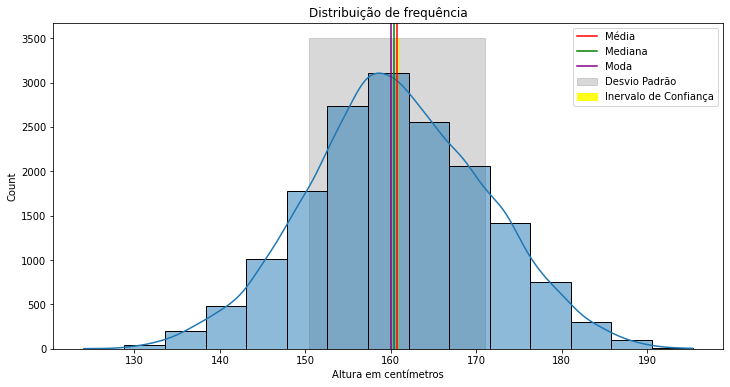

In [107]:
ax = sns.histplot(data=dados, x=dados['VB17004'], kde=True, bins=k)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
ax.axvline(media, color='red', linestyle='-', label='Média')
ax.axvline(mediana, color='green', linestyle='-', label='Mediana')
ax.axvline(moda[0], color='purple', label='Moda')
ax.fill_betweenx(y=[0,3500], 
                 x1=menor_std,
                 x2=maior_std,
                 color='gray', label='Desvio Padrão', alpha=0.30)
ax.fill_betweenx(y=[0,3500], 
                 x1=intervalo_confianca[0],
                 x2=intervalo_confianca[1],
                 color='yellow', label='Inervalo de Confiança', alpha=0.90)
ax.legend()
plt.show()

## Testes Estatísticos:

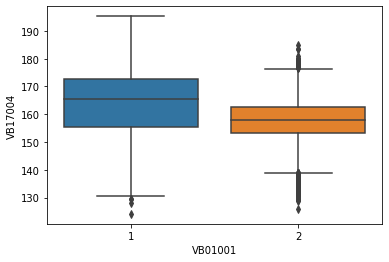

In [108]:
ax = sns.boxplot(x='VB01001', y='VB17004', data=dados)
ax;

Vamos utilizar o ztest para comparar a distribuição das alturas entre o sexo masculino e feminino.

In [109]:
distribuicao_altura_m = dados.query('VB01001 == 1')['VB17004']
distribuicao_altura_f = dados.query('VB01001 == 2')['VB17004']

In [110]:
distribuicao_altura_m

2        161.4
3        172.5
4        167.5
8        170.0
11       168.3
         ...  
16548    160.5
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 8287, dtype: float64

In [111]:
distribuicao_altura_f

0        157.0
1        152.0
5        160.5
6        157.5
7        159.4
         ...  
16545    158.5
16547    156.5
16549    158.5
16550    158.1
16551    167.9
Name: VB17004, Length: 8269, dtype: float64

In [112]:
ztest(distribuicao_altura_m, distribuicao_altura_f)

(41.16851708819389, 0.0)

In [113]:
_, p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)
p_value

0.0

O segundo parâmetro do ztest é conhecido com p_value. Pelo p_value eu posso aceitar o rejeitar a hipótese nula. Se o valor é menor que 0,5, a hipótese é rejeitada. <br> No caso do exemplo das alturas, como o p_value é 0,0, podemos concluir que a distribuição das alturas do sexo masculino e feminino são diferentes.

Podemos também utilizar testes estatísticos para analisar se a distribuição é ou não normal. <br><br>

Relembrando o histograma de distribuição de alturas por sexo:

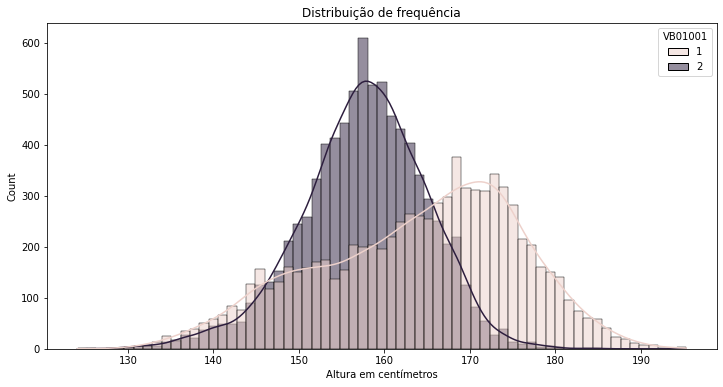

In [114]:
ax = sns.histplot(data=dados, x=dados['VB17004'], kde=True, hue=dados['VB01001'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura em centímetros')
plt.show()

O teste de normalização será importado da biblioteca scipy.

In [115]:
from scipy.stats import normaltest

In [116]:
normaltest(distribuicao_altura_m)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

In [117]:
_, p_value_normaltest_m = normaltest(distribuicao_altura_m)
_, p_value_normaltest_f = normaltest(distribuicao_altura_f)
print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


**Testes não paramétricos** <br>
Como exemplo de teste não paramétricos vamos utilizar o ranksums:

In [118]:
ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

Como o nível de confiança do nosso intervalo de confiança é de 95%, se o p_value for menor que 0.05, a hipótese nula foi rejeitada. <br>
No ranksums a verificação é se as duas distribuições que estamos comparando provém da mesma distribuição.